In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df=pd.read_csv(r"C:\Users\tanji\Desktop\myPW\end to endprojects\Algerian Fire prediction (regression)\Algerian_forest_fires_dataset_cleaned.csv")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [11]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [12]:
df.drop(['day','month','year'],axis=1, inplace=True)

In [13]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [14]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1) #encoding Classes column
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

## Train_test_split

In [24]:
#train_test_split

x=df.drop('FWI', axis=1)
y=df['FWI']

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=42)

In [25]:
x_train.shape,x_test.shape

((182, 11), (61, 11))

<Axes: >

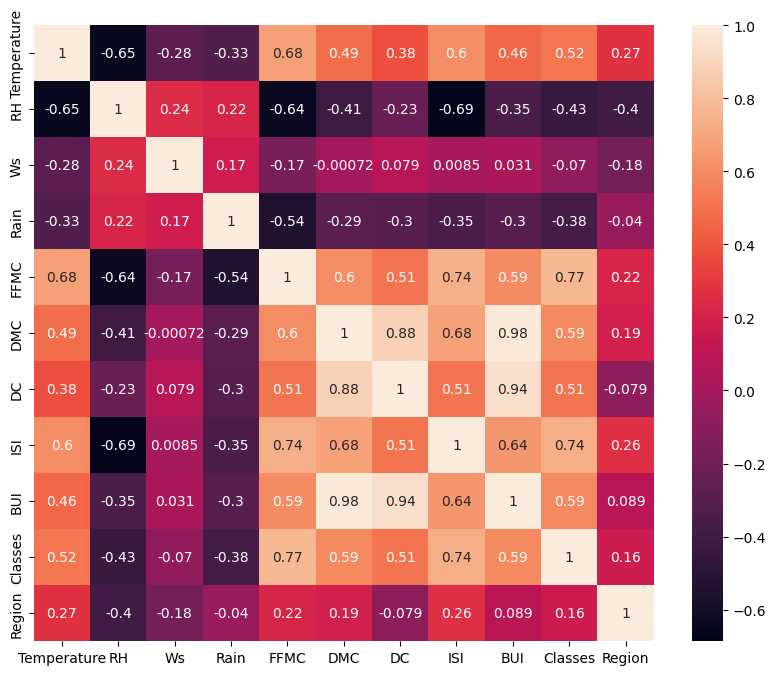

In [32]:
#Check for multicolinearity
plt.figure(figsize=(10,8))
sns.heatmap(x.corr(),annot=True)

In [38]:
def correlation(dataset, threshold):  #we check the upper triangular matric because it is symmetric and also to avoid dropping both the correlated features
    col_cor=set()
    col_mat=dataset.corr()
    for i in range(len(col_mat.columns)):
        for j in range(i):
            if(abs(col_mat.iloc[i,j])>threshold):
                col_cor.add(col_mat.columns[i])
    return col_cor

In [40]:
cor_features=correlation(x_train,0.85)
cor_features

{'BUI', 'DC'}

In [41]:
x_train.drop(cor_features,axis=1,inplace=True)   #dropping highly correlated features
x_test.drop(cor_features,axis=1,inplace=True)

## Standardization

In [43]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

Text(0.5, 1.0, 'After scaling')

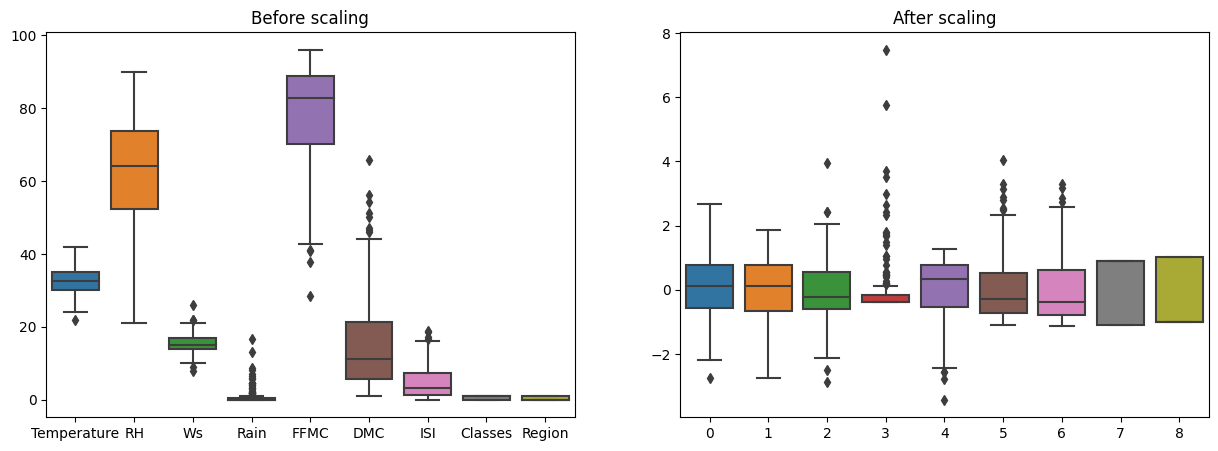

In [49]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title("Before scaling")

plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaled)
plt.title("After scaling")

# Linear Regression

mean bsolute eror 0.54682
r2 score 0.98477


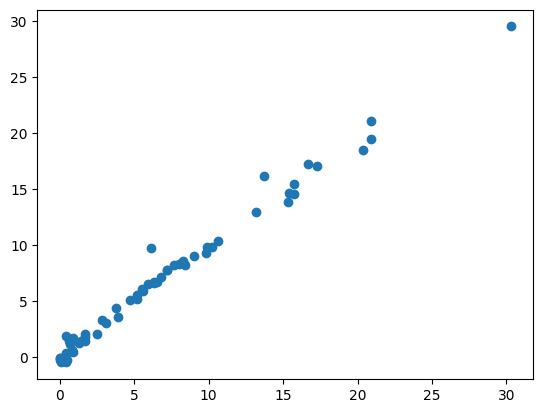

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

linreg=LinearRegression()
linreg.fit(x_train_scaled,y_train)
y_pred=linreg.predict(x_test_scaled)

print(f"mean bsolute eror {mean_absolute_error(y_test,y_pred):.5f}")
print(f"r2 score {r2_score(y_test,y_pred):.5f}")
plt.scatter(y_test,y_pred)

# Lasso regression

mean bsolute eror 1.13318
r2 score 0.94920


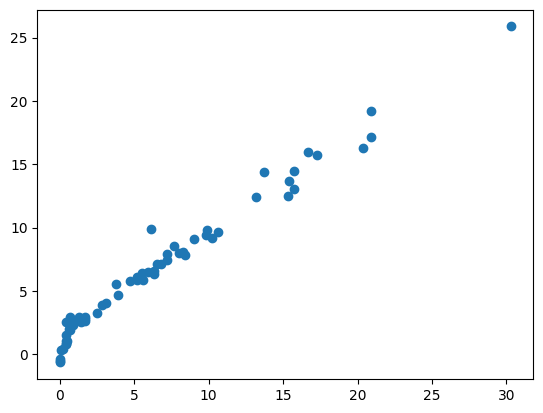

In [62]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,r2_score

lasso=Lasso()
lasso.fit(x_train_scaled,y_train)
y_pred=lasso.predict(x_test_scaled)

print(f"mean bsolute eror {mean_absolute_error(y_test,y_pred):.5f}")
print(f"r2 score {r2_score(y_test,y_pred):.5f}")
plt.scatter(y_test,y_pred)

## Ridge regression

mean bsolute eror 0.56423
r2 score 0.98430


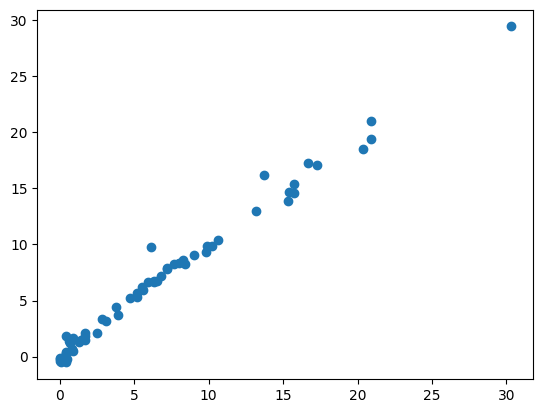

In [63]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,r2_score

ridge=Ridge()
ridge.fit(x_train_scaled,y_train)
y_pred=ridge.predict(x_test_scaled)

print(f"mean bsolute eror {mean_absolute_error(y_test,y_pred):.5f}")
print(f"r2 score {r2_score(y_test,y_pred):.5f}")
plt.scatter(y_test,y_pred)

# Lasso CV

mean bsolute eror 0.61997
r2 score 0.98209


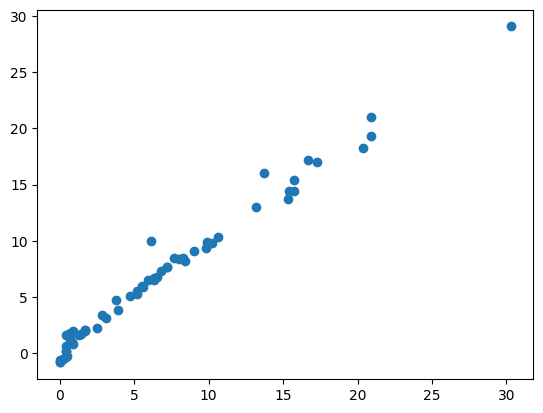

In [64]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error,r2_score

lassocv=LassoCV(cv=5)
lassocv.fit(x_train_scaled,y_train)
y_pred=lassocv.predict(x_test_scaled)

print(f"mean bsolute eror {mean_absolute_error(y_test,y_pred):.5f}")
print(f"r2 score {r2_score(y_test,y_pred):.5f}")
plt.scatter(y_test,y_pred)

# Elastic Net

mean bsolute eror 1.88224
r2 score 0.87535


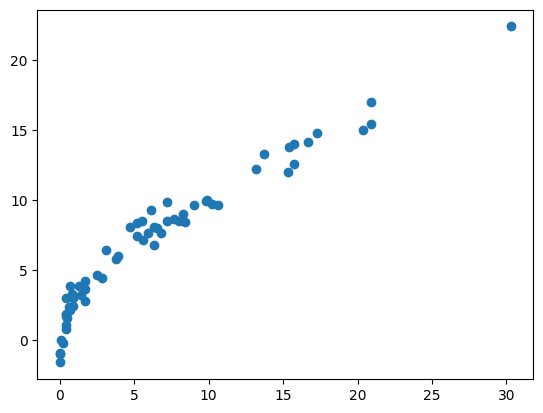

In [65]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,r2_score

elnet=ElasticNet()
elnet.fit(x_train_scaled,y_train)
y_pred=elnet.predict(x_test_scaled)

print(f"mean bsolute eror {mean_absolute_error(y_test,y_pred):.5f}")
print(f"r2 score {r2_score(y_test,y_pred):.5f}")
plt.scatter(y_test,y_pred)

# Model Pickling

In [66]:
scaler

StandardScaler()

In [67]:
ridge

Ridge()

- Pickle the two models

In [68]:
import pickle

pickle.dump(scaler,open('scalermodel.plk','wb'))
pickle.dump(ridge,open('ridgereg.plk','wb'))